Model for trade disruptions

I. First I simulate 6 points on a 30x30 square space to obtain realistic distances between the cities

Points: {'City A': (24.434344363434313, 2.880688302266512), 'City B': (27.731829434217268, 21.912663699301273), 'City C': (7.720200585588498, 12.82451388991834), 'City D': (1.0243898605219592, 4.418735031454329), 'City E': (19.543426126400792, 23.165669216950736), 'City F': (5.660942254012441, 20.897624523451288)}

Distances between points:
Distance from City A to City B: 19.3
Distance from City A to City C: 19.4
Distance from City A to City D: 23.5
Distance from City A to City E: 20.9
Distance from City A to City F: 26.0
Distance from City B to City A: 19.3
Distance from City B to City C: 22.0
Distance from City B to City D: 31.9
Distance from City B to City E: 8.3
Distance from City B to City F: 22.1
Distance from City C to City A: 19.4
Distance from City C to City B: 22.0
Distance from City C to City D: 10.7
Distance from City C to City E: 15.7
Distance from City C to City F: 8.3
Distance from City D to City A: 23.5
Distance from City D to City B: 31.9
Distance from City D to City C

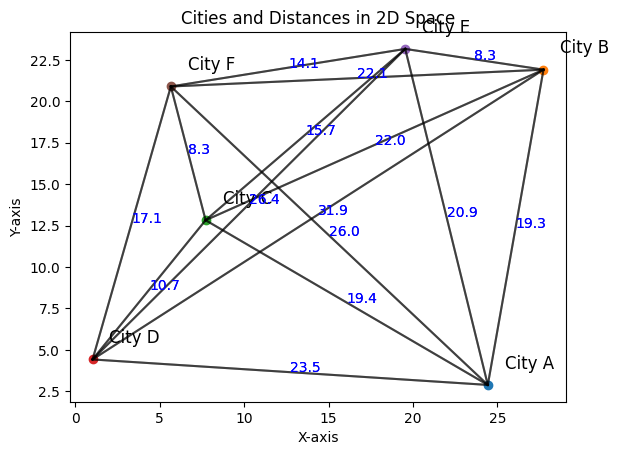

In [9]:
import random
import math
import matplotlib.pyplot as plt

# Set the seed for reproducibility (78)
random.seed(78)

def generate_random_point():
    return (random.uniform(0, 30), random.uniform(0, 30))

# Euclidean distance
def calculate_distance(point1, point2):
    return round(math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2), 1)

# Generate 6 random points
cities = [f"City {chr(65 + i)}" for i in range(6)]
points = {cities[i]: generate_random_point() for i in range(6)}

# Calculate distances
distances = {}
for point1, coords1 in points.items():
    for point2, coords2 in points.items():
        if point1 != point2:
            distances[(point1, point2)] = calculate_distance(coords1, coords2)

print("Points:", points)
print("\nDistances between points:")
for (point1, point2), distance in distances.items():
    print(f"Distance from {point1} to {point2}: {distance}")

# Plot
fig, ax = plt.subplots()

# Plot the points
for label, (x, y) in points.items():
    ax.scatter(x, y)
    ax.text(x + 1, y + 1, label, fontsize=12)

# Plot the distances between each pair of points
for (point1, point2), distance in distances.items():
    x1, y1 = points[point1]
    x2, y2 = points[point2]
    ax.plot([x1, x2], [y1, y2], 'k-', alpha=0.5)  # Draw line between points
    mid_x = (x1 + x2) / 2
    mid_y = (y1 + y2) / 2
    ax.text(mid_x, mid_y, f'{distance}', fontsize=10, color='blue')

ax.set_title("Cities and Distances in 2D Space")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
plt.show()


My distance matrix will have the following form:
self.distances = {
            ('A', 'B'): 19.3, ('A', 'C'): 19.4, ('A', 'D'): 23.5, ('A', 'E'): 20.9, ('A', 'F'): 26.0,
            ('B', 'C'): 22.0, ('B', 'D'): 31.9 , ('B', 'E'): 8.3, ('B', 'F'): 22.1,
            ('C', 'D'): 10.7, ('C', 'E'): 15.7, ('C', 'F'): 8.3,
            ('D', 'E'): 26.4, ('D', 'F'): 17.1,
            ('E', 'F'): 14.1
        }

The below is an examplary model of trade with disruption.

The key elements are:
- cities that produce and sell goods to accumulate wealth
- populations that consume wealth and grow or decrease depending on the surplus/deficit
- consumption dependent on the total population and the wealth effect (simplified here, but the higher the surplus wealth the greater the consumption per citizen)
- random trade which gives additional profit to the seller (no wealth transfers, just profit here)
- distances between cities which determine trade efficiency
- randomly occuring war events which impair production and trade efficiency


Multiple assumptions embedded in mathematical expressions of different economic behaviours and processes. Can adjust functions/parameters if needed.

First lets run the model to see how it works.


Step 1
War has impacted City E! Production and trade efficiency reduced.
City D traded 2 units of silver to City A profiting 22.95 from each unit
City D traded 2 units of silk to City A profiting 76.50 from each unit
City D traded 4 units of tin to City F profiting 8.29 from each unit
City D traded 4 units of copper to City F profiting 12.43 from each unit
City D traded 2 units of tin to City C profiting 8.93 from each unit
City D traded 2 units of copper to City C profiting 13.39 from each unit
City D traded 2 units of copper to City E profiting 11.04 from each unit
City D traded 4 units of silver to City B profiting 20.43 from each unit
City D population increased to 2045. Wealth after consumption: 371.18
City A traded 2 units of lead to City D profiting 6.12 from each unit
City A traded 2 units of gold to City D profiting 38.25 from each unit
City A traded 5 units of tin to City F profiting 7.40 from each unit
City A traded 2 units of copper to City F profiting 11.10 from each unit

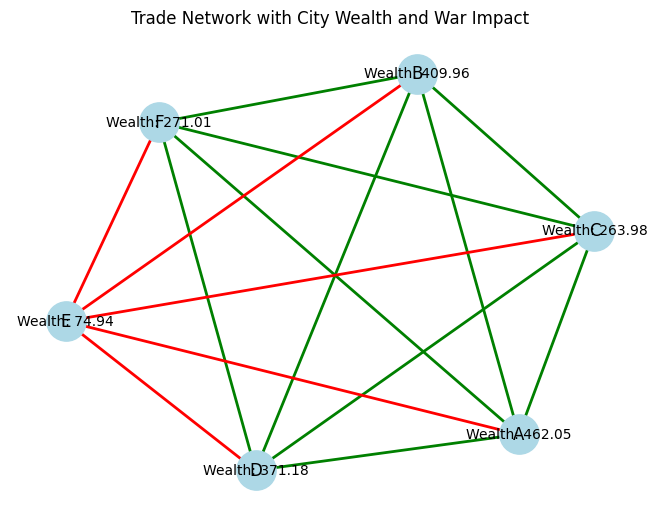


Step 2
City E traded 4 units of silver to City B profiting 13.76 from each unit
City E traded 5 units of tin to City C profiting 4.21 from each unit
City E traded 2 units of tin to City F profiting 4.29 from each unit
City E traded 2 units of silver to City A profiting 11.87 from each unit
City E traded 2 units of silk to City A profiting 39.55 from each unit
City E population increased to 2051. Wealth after consumption: 52.82
City D traded 3 units of copper to City E profiting 11.04 from each unit
City D traded 5 units of silver to City B profiting 20.43 from each unit
City D traded 2 units of tin to City C profiting 8.93 from each unit
City D traded 5 units of copper to City C profiting 13.39 from each unit
City D traded 4 units of tin to City F profiting 8.29 from each unit
City D traded 1 units of copper to City F profiting 12.43 from each unit
City D traded 2 units of silver to City A profiting 22.95 from each unit
City D traded 2 units of silk to City A profiting 76.50 from each

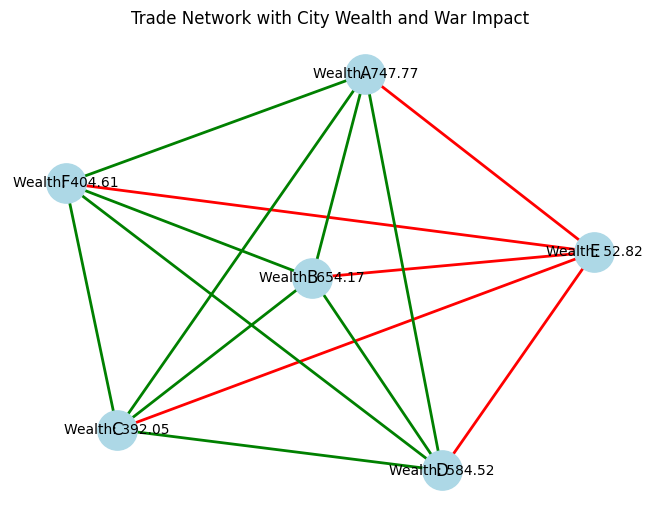


Step 3
City B traded 1 units of silk to City A profiting 80.70 from each unit
City B traded 2 units of tin to City C profiting 7.80 from each unit
City B traded 4 units of copper to City C profiting 11.70 from each unit
City B traded 2 units of lead to City C profiting 6.24 from each unit
City B traded 5 units of tin to City F profiting 7.79 from each unit
City B traded 1 units of copper to City F profiting 11.69 from each unit
City B traded 5 units of lead to City D profiting 5.45 from each unit
City B traded 2 units of copper to City E profiting 13.76 from each unit
City B traded 1 units of lead to City E profiting 7.34 from each unit
City B population increased to 2166. Wealth after consumption: 845.06
City A traded 3 units of gold to City B profiting 40.35 from each unit
City A traded 5 units of tin to City C profiting 8.06 from each unit
City A traded 5 units of copper to City C profiting 12.09 from each unit
City A traded 4 units of lead to City C profiting 6.45 from each unit
C

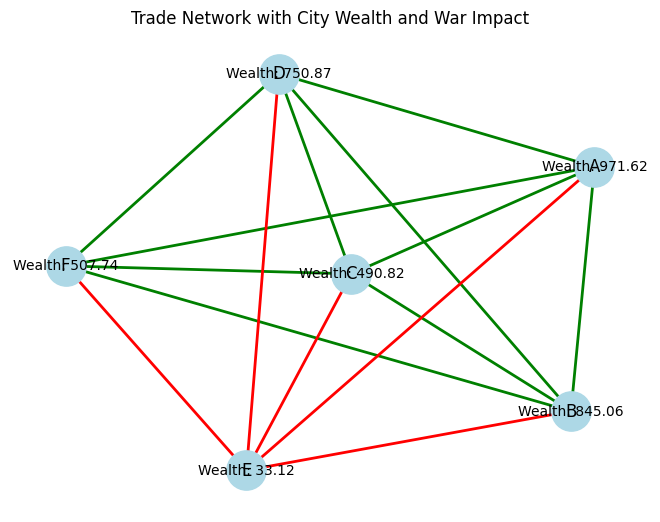

In [21]:
import mesa
import random
import networkx as nx
import matplotlib.pyplot as plt

random.seed(28)

class CityAgent(mesa.Agent):
    """A city agent representing a location with goods production and trading capabilities."""
    def __init__(self, unique_id, model, production):
        super().__init__(unique_id, model)
        self.production = production  # Dictionary of goods produced and quantities (e.g., {'tin': 10})
        self.wealth = 100  # starting wealth
        self.population = 2000 # starting population
        self.production_efficiency = 1.0 # initial production efficiency // changes during war
        self.trade_efficiency = 1.0  # trade efficiency
        self.war_status = False  # tracks if the city is affected by war
        self.war_duration = 0  # how long the city has been at war ?

    def produce_goods(self):
        """Increase wealth based on the production of goods."""
        for good, quantity in self.production.items():
            self.wealth += quantity * self.model.base_prices[good] * self.production_efficiency # realise profit from domestic production/trade

    def trade(self): # additional income from inter-state trade
        """Trade goods with all other cities."""
        for other_city in self.model.schedule.agents:
            if other_city.unique_id == self.unique_id:
                continue  # Skip trading with itself
            distance = self.model.distances[(self.unique_id, other_city.unique_id)]
            for good, base_price in self.model.base_prices.items():
                if good in self.production:
                    continue  # Skip goods produced in the current city
                trade_profit = base_price * self.trade_efficiency * (1 - distance/100)  # profit from trade with transportation costs and war effects
                if good in other_city.production:
                    # Simulate trade by adjusting wealth based on distance-inflated price
                    trade_amount = random.randint(1,5) # random
                    self.wealth += trade_profit # additional profit is realised from trade for the seller
                    print(f"City {self.unique_id} traded {trade_amount} units of {good} to City {other_city.unique_id} profiting {trade_profit:.2f} from each unit")


    def calculate_consumption(self):
        """Calculate the total consumption based on population and excess wealth."""
        # Base consumption is directly related to the population
        base_consumption = self.population / 10  # assumption: each unit of population consumes 0.1 units of wealth
        # additional consumption from excess wealth (20% of the surplus)
        if self.wealth > base_consumption:
            extra_consumption = (self.wealth - base_consumption) * 0.2
        else:
            extra_consumption = 0
        
        total_consumption = base_consumption + extra_consumption
        return total_consumption

    def consume(self):
        """Consume wealth based on population level and additional consumption."""
        total_consumption = self.calculate_consumption()

        if self.wealth > total_consumption:
            # Calculate surplus as a ratio of wealth over consumption
            surplus_ratio = (self.wealth - total_consumption) / total_consumption
            self.wealth -= total_consumption

            # Population growth depends on the surplus ratio
            growth_rate = 0.01 + 0.01 * min(surplus_ratio, 7)  # I will cap the growth at 8%
            self.population += int(self.population * growth_rate)
            
            print(f"City {self.unique_id} population increased to {self.population}. Wealth after consumption: {self.wealth:.2f}")
        
        else:
            # Calculate deficit as a ratio of consumption over wealth
            deficit_ratio = (total_consumption - self.wealth) / max(total_consumption, 1)
            self.wealth = max(0, self.wealth - total_consumption)
            
            # Population decline depends on the deficit ratio
            decline_rate = 0.01 + 0.10 * min(deficit_ratio, 1)  # cap decline at 11%
            self.population -= int(self.population * decline_rate)
            self.population = max(1, self.population)  # population cant go under 1
            
            print(f"City {self.unique_id} population decreased to {self.population}. Wealth after consumption: {self.wealth:.2f}")


    def step(self):
        """Execute one step in the simulation: produce, trade, consume and check for war conditions."""
        if self.war_status:
            # If the city is at war, check for the chance of the war ending
            if random.random() < 0.3:  # e.g. 30% chance to end the war at each period
                self.end_war()

        self.produce_goods()
        self.trade()
        self.consume()

    def start_war(self):
        """Start a war in the city, reducing trade efficiency."""
        self.war_status = True
        self.war_duration = random.randint(5, 20)  # War lasts between 5 and 20 steps initially
        self.trade_efficiency *= 0.5  # Reduce production and trading efficiency by 50%
        self.production_efficiency *= 0.75 # Reduce production by 25%
        print(f"War has impacted City {self.unique_id}! Production and trade efficiency reduced.")

    def end_war(self):
        """End the war, restoring normal efficiency."""
        self.war_status = False
        self.trade_efficiency = 1.0  # Restore trade efficiency to normal
        self.production_efficiency = 1.0 # Restore production efficiency to normal
        print(f"War in City {self.unique_id} has ended. Trade routes restored.")

class TradeModel(mesa.Model):
    """A model to simulate trade between cities with different goods production and war impacts."""
    def __init__(self):
        super().__init__()
        self.schedule = mesa.time.RandomActivation(self)
        self.base_prices = {
            'tin': 10, 'copper': 15, 'lead': 8, 'gold': 50, 'silver': 30, 'silk': 100
        }
        self.production = {
            'A': {'silver': 3, 'silk': 4}, # domestic value: 90 + 400 = 490
            'B': {'gold': 2, 'silver': 12}, # domestic value: 100 + 360 = 460
            'C': {'tin': 4, 'copper': 8, 'lead': 2}, # domestic value: 40 + 120 + 16 = 176
            'D': {'lead': 5, 'gold': 7}, # domestic value: 40 + 350 = 390
            'E': {'copper': 2, 'lead': 10, 'gold': 1}, # domestic value: 30 + 80 + 50 = 160
            'F': {'tin': 10, 'copper': 5} # domestic value: 100 + 65 = 165
        }
        self.distances = {
            ('A', 'B'): 19.3, ('A', 'C'): 19.4, ('A', 'D'): 23.5, ('A', 'E'): 20.9, ('A', 'F'): 26.0,
            ('B', 'C'): 22.0, ('B', 'D'): 31.9 , ('B', 'E'): 8.3, ('B', 'F'): 22.1,
            ('C', 'D'): 10.7, ('C', 'E'): 15.7, ('C', 'F'): 8.3,
            ('D', 'E'): 26.4, ('D', 'F'): 17.1,
            ('E', 'F'): 14.1
        }
        # Ensure the distances are bi-directional
        for (city1, city2), distance in list(self.distances.items()):
            self.distances[(city2, city1)] = distance

        # Create agents
        for city_id, prod in self.production.items():
            agent = CityAgent(city_id, self, prod)
            self.schedule.add(agent)

    def step(self):
        """Advance the model by one step and potentially trigger a war."""
        if random.random() < 0.2:  # 10% chance to trigger war event at each step
            self.trigger_war()
        self.schedule.step()
        self.visualize_network()

    def trigger_war(self):
        """Trigger war that affects one city."""
        affected_city = random.choice(list(self.production.keys()))
        agent = next(a for a in self.schedule.agents if a.unique_id == affected_city)
        agent.start_war()

    def visualize_network(self):
        """Visualize the network with city wealth and production details."""
        G = nx.Graph()
        
        # Add nodes with wealth info
        for agent in self.schedule.agents:
            G.add_node(agent.unique_id, wealth=agent.wealth)

        # Add edges (representing trade routes)
        for (city1, city2), distance in self.distances.items():
            G.add_edge(city1, city2)

        # Visualize the network
        pos = nx.spring_layout(G)
        edges = list(G.edges())
        edge_colors = []

        # Highlight edges (trade routes) of cities at war in red
        for edge in edges:
            city1, city2 = edge
            city1_agent = next(a for a in self.schedule.agents if a.unique_id == city1)
            city2_agent = next(a for a in self.schedule.agents if a.unique_id == city2)
            if city1_agent.war_status or city2_agent.war_status:
                edge_colors.append('red')  # If either city is at war, the edge is red
            else:
                edge_colors.append('green')  # unaffected trade routes are green

        # Draw the network graph
        nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color=edge_colors, node_size=800, width=2)
        
        # Display wealth information on nodes
        wealth_labels = {agent.unique_id: f"Wealth: {agent.wealth:.2f}" for agent in self.schedule.agents}
        nx.draw_networkx_labels(G, pos, labels=wealth_labels, font_size=10)
        
        plt.title("Trade Network with City Wealth and War Impact")
        plt.show()

# Run the model for a few steps
model = TradeModel()
for i in range(3):  # Run for 10 steps to observe behavior
    print(f"\nStep {i + 1}")
    model.step()


The model as it is currently defined simulates few things. 

First, we have production with pre-defined capabilites of each city to produce a certain quantity of some  goods.

Second, we have trade that occurs after production. At each step, a city will look for a buyer to sell them the goods. The buyers are other cities which do not produce a given good (no need to buy if you can produce). Importantly, only profit is realised from trade by the seller while the buyer does not 'pay' for the goods. This profit is further depndent on the distance between the cities which is also pre-specified. Currently, the cities choose their trading partners randomly without accounting for efficiency.

Third, we have consumption, which is dependent on the total population and wealth surplus. The wealthier the city and the more inhabitants it has the more wealth it consumes. 

Last, we have population dynamics. While there is a surplus of wealth the population grows and while it falls below the threshold it decreases.

Additionally there is a random event called 'war' which can affect any of the cities at a random moment. When it does production and trade are negatively affected.

II. Looking at wealth and population changes

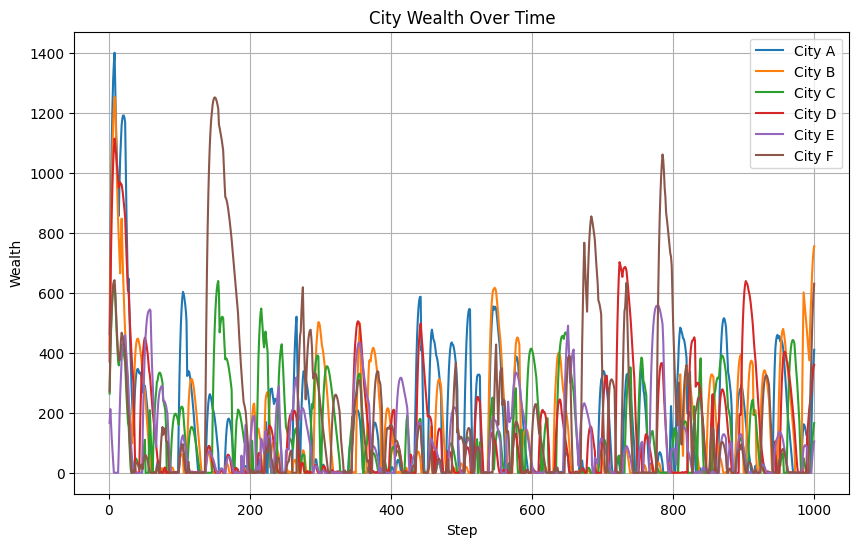

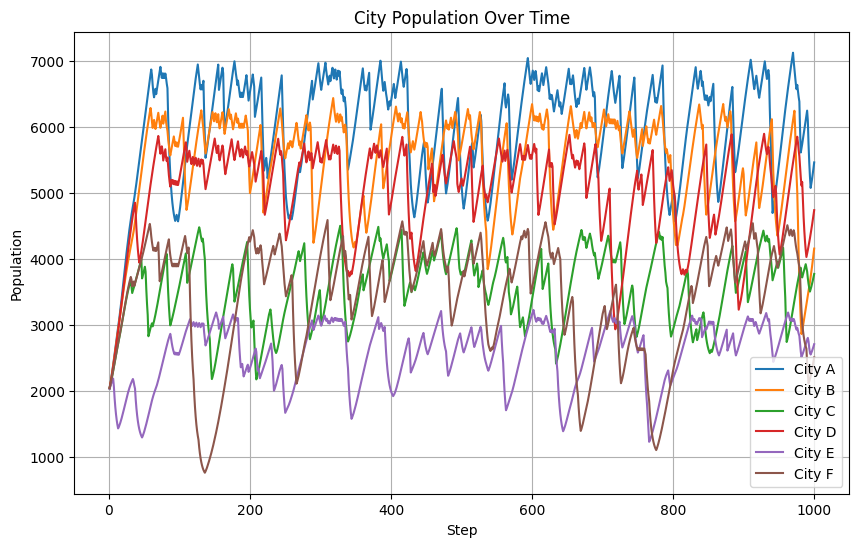

In [25]:
import mesa
import random
import networkx as nx
import matplotlib.pyplot as plt

class CityAgent(mesa.Agent):
    """A city agent representing a location with goods production and trading capabilities."""
    def __init__(self, unique_id, model, production):
        super().__init__(unique_id, model)
        self.production = production  # Dictionary of goods produced and quantities (e.g., {'tin': 10})
        self.wealth = 100  
        self.population = 2000
        self.production_efficiency = 1.0
        self.trade_efficiency = 1.0
        self.war_status = False
        self.war_duration = 0  # everything stays same here

    def produce_goods(self):
        """Increase wealth based on the production of goods."""
        for good, quantity in self.production.items():
            self.wealth += quantity * self.model.base_prices[good] * self.production_efficiency

    def trade(self):
        """Trade goods with all other cities."""
        for other_city in self.model.schedule.agents:
            if other_city.unique_id == self.unique_id:
                continue  # Skip trading with itself
            distance = self.model.distances[(self.unique_id, other_city.unique_id)]
            # Adjust for trade efficiency penalties if either city is at war
            trade_efficiency_penalty = min(self.trade_efficiency, other_city.trade_efficiency)
            for good, base_price in self.model.base_prices.items():
                if good in self.production:
                    continue  # Skip goods produced in the current city
                trade_profit = base_price * trade_efficiency_penalty * (1 - distance/100)
                if good in other_city.production:
                    # Simulate trade by adjusting wealth based on distance-inflated price
                    trade_amount = random.randint(1, 5)
                    self.wealth += trade_profit

    def calculate_consumption(self):
        """Calculate the total consumption based on population and excess wealth."""
        base_consumption = self.population / 10  # Assumption: each unit of population consumes 0.1 units of wealth
        if self.wealth > base_consumption:
            extra_consumption = (self.wealth - base_consumption) * 0.2
        else:
            extra_consumption = 0

        total_consumption = base_consumption + extra_consumption
        return total_consumption

    def consume(self):
        """Consume wealth based on population level and additional consumption."""
        total_consumption = self.calculate_consumption()

        if self.wealth > total_consumption:
            surplus_ratio = (self.wealth - total_consumption) / total_consumption
            self.wealth -= total_consumption
            growth_rate = 0.01 + 0.01 * min(surplus_ratio, 8)  # can change the growth cap
            self.population += int(self.population * growth_rate)

        else:
            deficit_ratio = (total_consumption - self.wealth) / max(total_consumption, 1)
            self.wealth = max(0, self.wealth - total_consumption)
            decline_rate = 0.01 + 0.19 * min(deficit_ratio, 1)  # can change decline cap
            self.population -= int(self.population * decline_rate)
            self.population = max(1, self.population)  # keep population above 0

    def step(self):
        """Execute one step in the simulation: produce, trade, consume and check for war conditions."""
        if self.war_status:
            if random.random() < 0.2:  # can change the probability of war occuring
                self.end_war()

        self.produce_goods()
        self.trade()
        self.consume()

    def start_war(self):
        """Start a war in the city, reducing trade efficiency."""
        self.war_status = True
        self.war_duration = random.randint(1, 20)
        self.trade_efficiency *= 0.5  # can change trade efficiency parameter
        self.production_efficiency *= 0.75  # can change production efficiency param

    def end_war(self):
        """End the war, restoring normal efficiency."""
        self.war_status = False
        self.trade_efficiency = 1.0 
        self.production_efficiency = 1.0 

class TradeModel(mesa.Model):
    """A model to simulate trade between cities with different goods production and war impacts."""
    def __init__(self):
        super().__init__()
        self.schedule = mesa.time.RandomActivation(self)
        self.base_prices = {
            'tin': 10, 'copper': 15, 'lead': 8, 'gold': 50, 'silver': 30, 'silk': 100
        }
        self.production = {
            'A': {'silver': 3, 'silk': 4}, # domestic value: 90 + 400 = 490
            'B': {'gold': 2, 'silver': 12}, # domestic value: 100 + 360 = 460
            'C': {'tin': 4, 'copper': 8, 'lead': 2}, # domestic value: 40 + 120 + 16 = 176
            'D': {'lead': 5, 'gold': 7}, # domestic value: 40 + 350 = 390
            'E': {'copper': 2, 'lead': 10, 'gold': 1}, # domestic value: 30 + 80 + 50 = 160
            'F': {'tin': 10, 'copper': 5} # domestic value: 100 + 65 = 165
        }
        self.distances = {
            ('A', 'B'): 19.3, ('A', 'C'): 19.4, ('A', 'D'): 23.5, ('A', 'E'): 20.9, ('A', 'F'): 26.0,
            ('B', 'C'): 22.0, ('B', 'D'): 31.9 , ('B', 'E'): 8.3, ('B', 'F'): 22.1,
            ('C', 'D'): 10.7, ('C', 'E'): 15.7, ('C', 'F'): 8.3,
            ('D', 'E'): 26.4, ('D', 'F'): 17.1,
            ('E', 'F'): 14.1
        }
        for (city1, city2), distance in list(self.distances.items()):
            self.distances[(city2, city1)] = distance

        for city_id, prod in self.production.items():
            agent = CityAgent(city_id, self, prod)
            self.schedule.add(agent)

        # Track wealth and population of each city
        self.wealth_history = {city_id: [] for city_id in self.production.keys()}
        self.population_history = {city_id: [] for city_id in self.production.keys()}

    def step(self):
        """Advance the model by one step and potentially trigger a war."""
        if random.random() < 0.3:  # X chance to trigger a war each step
            self.trigger_war()
        self.schedule.step()

        # Track the wealth and population of each city
        for agent in self.schedule.agents:
            self.wealth_history[agent.unique_id].append(agent.wealth)
            self.population_history[agent.unique_id].append(agent.population)

    def trigger_war(self):
        """Trigger war that affects one city."""
        affected_city = random.choice(list(self.production.keys()))
        agent = next(a for a in self.schedule.agents if a.unique_id == affected_city)
        agent.start_war()

    def generate_wealth_graph(self):
        """Generate a graph tracking the wealth of each city over time."""
        plt.figure(figsize=(10, 6))
        for city_id, wealths in self.wealth_history.items():
            plt.plot(range(1, len(wealths) + 1), wealths, label=f"City {city_id}")
        plt.xlabel("Step")
        plt.ylabel("Wealth")
        plt.title("City Wealth Over Time")
        plt.legend()
        plt.grid(True)
        plt.show()

    def generate_population_graph(self):
        """Generate a graph tracking the population of each city over time."""
        plt.figure(figsize=(10, 6))
        for city_id, populations in self.population_history.items():
            plt.plot(range(1, len(populations) + 1), populations, label=f"City {city_id}")
        plt.xlabel("Step")
        plt.ylabel("Population")
        plt.title("City Population Over Time")
        plt.legend()
        plt.grid(True)
        plt.show()

    def run(self, steps):
        """Run the model for the specified number of steps and generate the graphs at the end."""
        for step in range(steps):
            self.step()

        # Generate and display the wealth and population graphs after all steps
        self.generate_wealth_graph()
        self.generate_population_graph()

# Create the model
model = TradeModel()

# Run the model for X steps and generate the wealth and population graphs at the end
model.run(1000)


We can see that wealth grows in cycles. This has to do with how the consumption and population growth is dependent on the surplus wealth in the model.

The population is largely stationary, when war occurs it drops occasionally but quickly recovers after. Currently no total collapse occurs.

Parameters in the model can be changed to examine different scenarios.

II. Introducing an enhanced version of the inter-city trade model

In the model above cities accumulate wealth not just by trading but from the production itself. This is rather unrealistic.

While still focusing only on profit from trrade, the below model introduces a stockpiling system. After being produced goods go to a 'repository' from which they are sold to potential buyers. This means that wealth now is only generated from trading.

The model also introduces additional improvements:
- dynamic production with diminishing returns (The higher the population, the higher the production but there are limits)
- new distance penalty function
- profit from trade is capped at 100 per unit sold (this helps control the population growth)
- random impact of wars on efficiency
- dynamic pricing

First run the model with the condition for war turned off to see if it yields reasonable results.

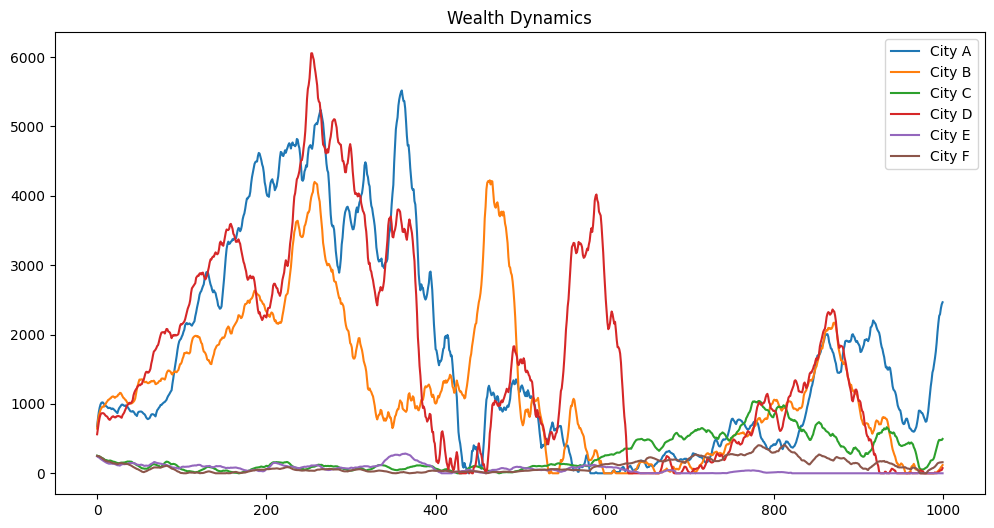

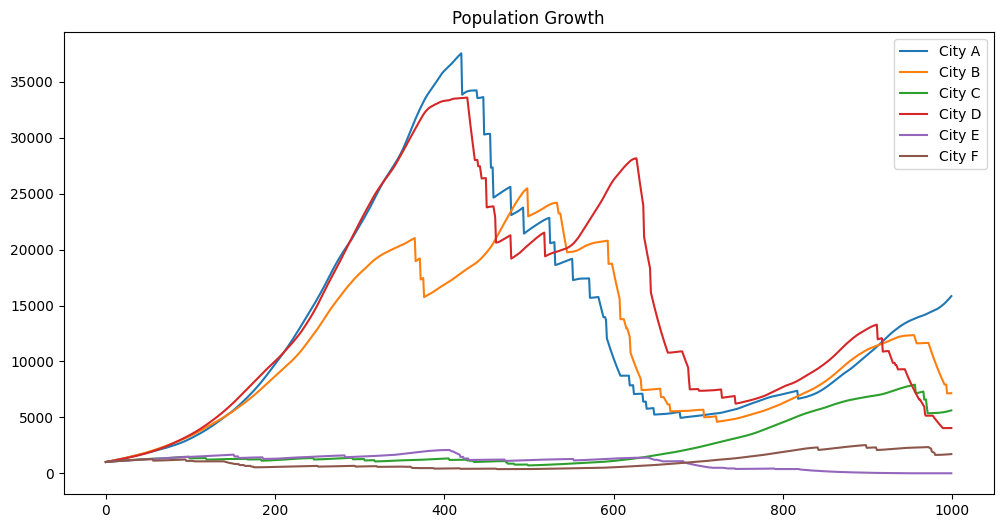

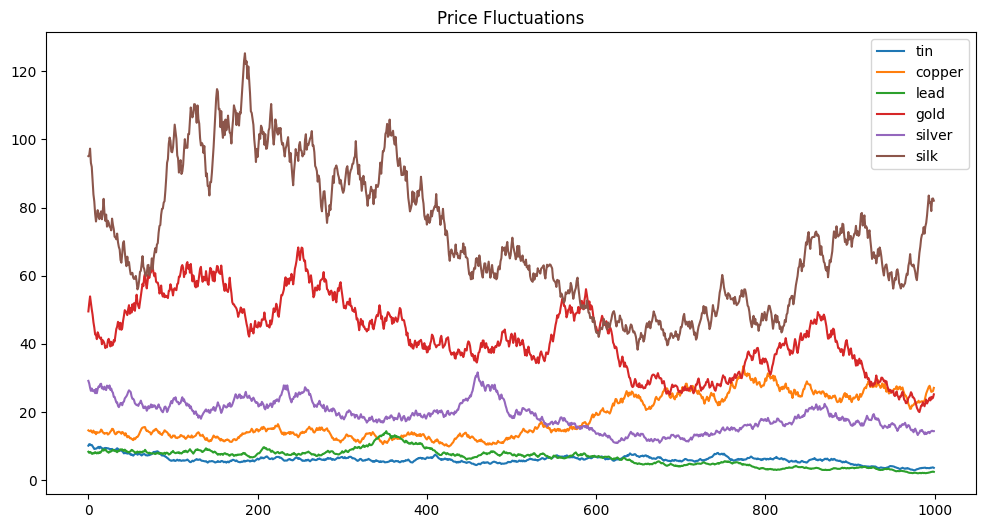

In [83]:
import mesa
import random
import matplotlib.pyplot as plt
from math import exp, factorial

random.seed(411) # 411

class CityAgent(mesa.Agent):
    """A city with production, trade, and population dynamics."""
    def __init__(self, unique_id, model, production):
        super().__init__(unique_id, model)
        self.production = production
        self.stock = production.copy()
        self.wealth = 100 # starting wealth
        self.population = 1000 # starting population
        self.production_efficiency = 1.0 # production parameter // not dependent on the population
        self.trade_efficiency = 1.0 # trade parameter
        self.war_status = False
        self.war_duration = 0 # tracking war duration

    def produce_goods(self):
        """Produce goods with a moderated population factor."""
        for good, quantity in self.production.items():
            population_factor = (self.population / 1000) ** 0.7 # diminishing returns on growing population
            produced = int(quantity * self.production_efficiency * population_factor) # calculate production
            self.stock[good] = self.stock.get(good, 0) + produced # add to the stock

    def find_buyer(self, good):
        """Find a buyer for a given good."""
        potential_buyers = [
            city for city in self.model.schedule.agents
            if good not in city.production and city.unique_id != self.unique_id # no realising wealth from self-trade
        ]
        return random.choice(potential_buyers) if potential_buyers else None

    def trade(self):
        """Trade goods for profits with reduced distance penalties."""
        for good, quantity in list(self.stock.items()):
            while self.stock[good] > 0:
                buyer = self.find_buyer(good)
                if not buyer:
                    break

                distance = self.model.distances.get((self.unique_id, buyer.unique_id), 20)
                distance_penalty = max(0.7, 1 - (distance / 200))  # changed penalty function

                trade_amount = min(self.stock[good], random.randint(1, 5)) # choose a random amount to trade
                trade_profit = trade_amount * self.model.base_prices[good] * self.trade_efficiency * distance_penalty
                trade_profit = min(trade_profit, trade_amount * 100) # cap proft from trade

                self.wealth += trade_profit
                self.stock[good] -= trade_amount

    def consume(self):
        """Handle consumption and population changes."""
        total_consumption = self.population / 10 + max(0, (self.wealth - (self.population / 10)) * 0.2) # wealth effect
        if self.wealth > total_consumption:
            self.wealth -= total_consumption
            growth_rate = 0.005 + 0.005 * min((self.wealth - total_consumption) / total_consumption, 5)  # scales with surplus wealth
            self.population += int(self.population * growth_rate)
        else:
            self.wealth = max(0, self.wealth - total_consumption)
            decline_rate = 0.005 + 0.015 * min((total_consumption - self.wealth) / max(total_consumption, 1), 1)  
            self.population = max(1, int(self.population * (1 - decline_rate)))

        if self.wealth < total_consumption * 0.5 and random.random() < 0.05: # 5% for famine when wealth drops below 50% of consumption
            self.population = int(self.population * 0.9) # 10% population instantly dies

    def poisson_probability(self):
        """War duration-based peace probability."""
        return 0 if self.war_duration == 0 else 1 - (exp(-0.5) / factorial(self.war_duration))

    def start_war(self):
        """Initiate war with reduced impacts."""
        self.war_status = True
        self.trade_efficiency *= random.choice([0.55, 0.65, 0.75, 0.85, 0.95])  # random impact on efficiency
        self.production_efficiency *= random.choice([0.5, 0.6, 0.7, 0.8, 0.9])  # and on production

    def end_war(self):
        """End war and begin recovery."""
        self.war_status = False
        self.war_duration = 0

    def step(self):
        """Execute production, trade, consumption, and war checks."""
        if self.war_status:
            self.war_duration += 1
            if random.random() < self.poisson_probability():
                self.end_war()
        else:
            self.trade_efficiency = min(1.0, self.trade_efficiency + 0.01)
            self.production_efficiency = min(1.0, self.production_efficiency + 0.01)

        self.produce_goods()
        self.trade()
        self.consume()

class TradeModel(mesa.Model):
    """Balanced trade model with dynamic pricing and war mechanics."""
    def __init__(self):
        super().__init__()
        self.schedule = mesa.time.RandomActivation(self)
        self.base_prices = {
            'tin': 10, 'copper': 15, 'lead': 8, 'gold': 50, 'silver': 30, 'silk': 100
        }
        self.production = {
            'A': {'silver': 3, 'silk': 4}, # domestic value: 90 + 400 = 490
            'B': {'gold': 2, 'silver': 12}, # domestic value: 100 + 360 = 460
            'C': {'tin': 4, 'copper': 8, 'lead': 2}, # domestic value: 40 + 120 + 16 = 176
            'D': {'lead': 5, 'gold': 7}, # domestic value: 40 + 350 = 390
            'E': {'copper': 2, 'lead': 10, 'gold': 1}, # domestic value: 30 + 80 + 50 = 160
            'F': {'tin': 10, 'copper': 5} # domestic value: 100 + 65 = 165
        }
        self.distances = {
            ('A', 'B'): 19.3, ('A', 'C'): 19.4, ('A', 'D'): 23.5, ('A', 'E'): 20.9, ('A', 'F'): 26.0,
            ('B', 'C'): 22.0, ('B', 'D'): 31.9 , ('B', 'E'): 8.3, ('B', 'F'): 22.1,
            ('C', 'D'): 10.7, ('C', 'E'): 15.7, ('C', 'F'): 8.3,
            ('D', 'E'): 26.4, ('D', 'F'): 17.1,
            ('E', 'F'): 14.1
        }
        for (c1, c2), d in list(self.distances.items()):
            self.distances[(c2, c1)] = d

        for city_id, goods in self.production.items():
            self.schedule.add(CityAgent(city_id, self, goods))

        self.wealth_history = {cid: [] for cid in self.production}
        self.population_history = {cid: [] for cid in self.production}
        self.price_history = {good: [] for good in self.base_prices}

    def trigger_war(self):
        """Randomly initiate war in a city (less frequent)."""
        if random.random() < 0:   # war currently turned off
            target = random.choice(list(self.production.keys()))
            agent = next(a for a in self.schedule.agents if a.unique_id == target)
            agent.start_war()

    def update_prices(self):
        """Dynamic pricing with smooth fluctuations."""
        total_stocks = {good: 0 for good in self.base_prices}
        for agent in self.schedule.agents:
            for good, qty in agent.stock.items():
                total_stocks[good] += qty

        for good in self.base_prices:
            new_price = self.base_prices[good] * (1 + random.uniform(-0.05, 0.05))
            self.base_prices[good] = max(2, new_price)  
            self.price_history[good].append(self.base_prices[good])

    def step(self):
        """Model step with dynamic pricing."""
        self.trigger_war()
        self.update_prices()
        self.schedule.step()

        for agent in self.schedule.agents:
            self.wealth_history[agent.unique_id].append(agent.wealth)
            self.population_history[agent.unique_id].append(agent.population)

    def run(self, steps):
        """Run simulation and generate visualisations."""
        for _ in range(steps):
            self.step()

        plt.figure(figsize=(12, 6))
        for cid, wealth in self.wealth_history.items():
            plt.plot(wealth, label=f'City {cid}')
        plt.title('Wealth Dynamics')
        plt.legend()
        plt.show()

        plt.figure(figsize=(12, 6))
        for cid, pop in self.population_history.items():
            plt.plot(pop, label=f'City {cid}')
        plt.title('Population Growth')
        plt.legend()
        plt.show()

        plt.figure(figsize=(12, 6))
        for good, prices in self.price_history.items():
            plt.plot(prices, label=good)
        plt.title('Price Fluctuations')
        plt.legend()
        plt.show()

# Run the modified simulation
model = TradeModel()
model.run(1000)

The model seems quite realistic. Wealthy cities which produce more expensive goods grow their wealth and population quickly at the beginning. However, diminishing returns of population size on production and the wealth effect lead to eventual overpopulation and the consumption becomes greater than what the city's economy can support. This might be consistent with evidence from the field which shows that consumption growth responds slowly to shocks (Sousa, 2009).

The simulated dynamic can lead to a total collapse like in City E's case where population drops to 0 and production stops. However, most of the time the cities seem to have a dynamic which allows them to recover even after intense periods of decline.

We can run the model with different seed and/or parameters to examine other scenarios.

In [ ]:
Turn the war condition on and rerun the model

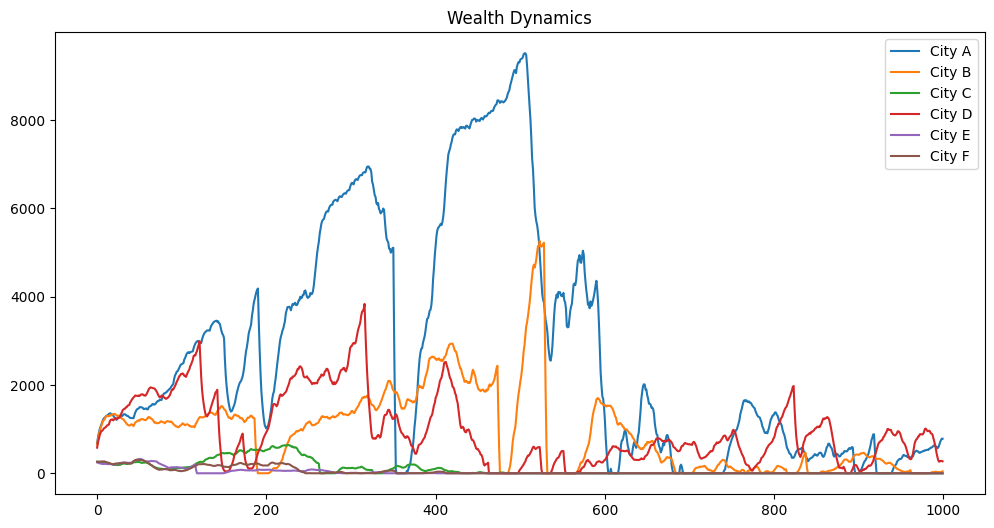

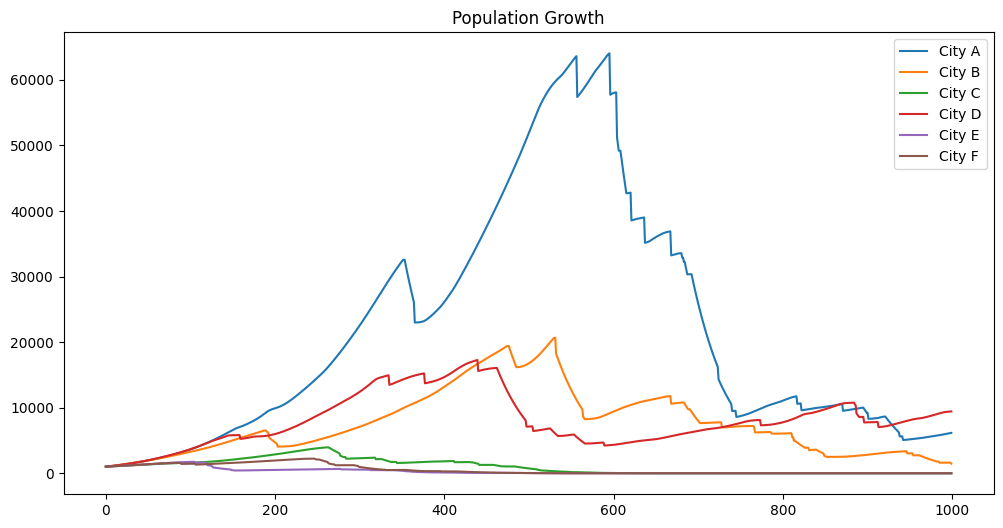

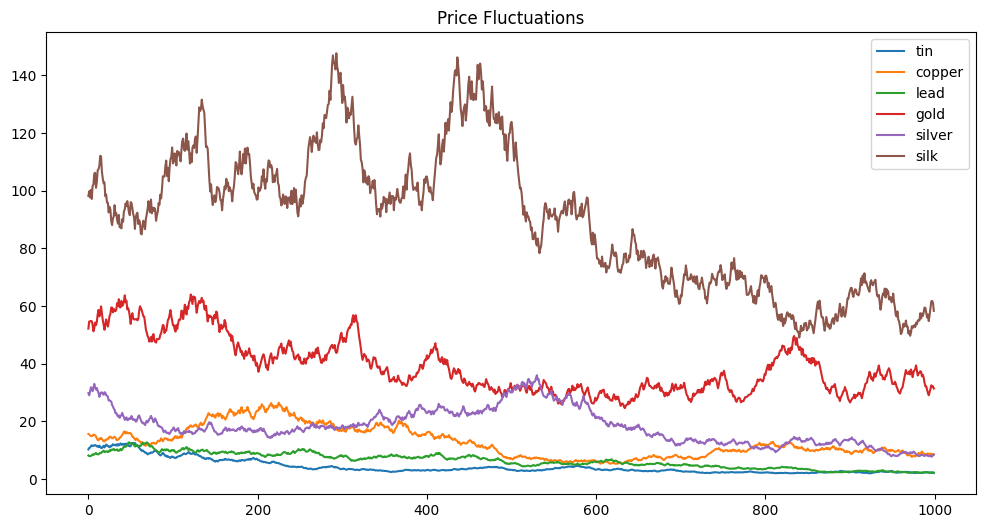

In [87]:
import mesa
import random
import matplotlib.pyplot as plt
from math import exp, factorial

random.seed(423)

class CityAgent(mesa.Agent):
    """A city with production, trade, and population dynamics."""
    def __init__(self, unique_id, model, production):
        super().__init__(unique_id, model)
        self.production = production
        self.stock = production.copy()
        self.wealth = 100 # starting wealth
        self.population = 1000 # starting population
        self.production_efficiency = 1.0 # production parameter // not dependent on the population
        self.trade_efficiency = 1.0 # trade parameter
        self.war_status = False
        self.war_duration = 0 # tracking war duration

    def produce_goods(self):
        """Produce goods with a moderated population factor."""
        for good, quantity in self.production.items():
            population_factor = (self.population / 1000) ** 0.7 # diminishing returns on growing population
            produced = int(quantity * self.production_efficiency * population_factor) # calculate production
            self.stock[good] = self.stock.get(good, 0) + produced # add to the stock

    def find_buyer(self, good):
        """Find a buyer for a given good."""
        potential_buyers = [
            city for city in self.model.schedule.agents
            if good not in city.production and city.unique_id != self.unique_id # no realising wealth from self-trade
        ]
        return random.choice(potential_buyers) if potential_buyers else None

    def trade(self):
        """Trade goods for profits with reduced distance penalties."""
        for good, quantity in list(self.stock.items()):
            while self.stock[good] > 0:
                buyer = self.find_buyer(good)
                if not buyer:
                    break

                distance = self.model.distances.get((self.unique_id, buyer.unique_id), 20)
                distance_penalty = max(0.7, 1 - (distance / 200))  # changed penalty function

                trade_amount = min(self.stock[good], random.randint(1, 5)) # choose a random amount to trade
                trade_profit = trade_amount * self.model.base_prices[good] * self.trade_efficiency * distance_penalty
                trade_profit = min(trade_profit, trade_amount * 100) # cap proft from trade

                self.wealth += trade_profit
                self.stock[good] -= trade_amount

    def consume(self):
        """Handle consumption and population changes."""
        total_consumption = self.population / 10 + max(0, (self.wealth - (self.population / 10)) * 0.2) # wealth effect
        if self.wealth > total_consumption:
            self.wealth -= total_consumption
            growth_rate = 0.005 + 0.005 * min((self.wealth - total_consumption) / total_consumption, 5)  # scales with surplus wealth
            self.population += int(self.population * growth_rate)
        else:
            self.wealth = max(0, self.wealth - total_consumption)
            decline_rate = 0.005 + 0.015 * min((total_consumption - self.wealth) / max(total_consumption, 1), 1)  
            self.population = max(1, int(self.population * (1 - decline_rate)))

        if self.wealth < total_consumption * 0.5 and random.random() < 0.05: # famine
            self.population = int(self.population * 0.9) # 10% population instantly dies

    def poisson_probability(self):
        """War duration-based peace probability."""
        return 0 if self.war_duration == 0 else 1 - (exp(-0.5) / factorial(self.war_duration))

    def start_war(self):
        """Initiate war with reduced impacts."""
        self.war_status = True
        self.trade_efficiency *= random.choice([0.55, 0.65, 0.75, 0.85, 0.95])  # random impact on efficiency
        self.production_efficiency *= random.choice([0.5, 0.6, 0.7, 0.8, 0.9])  # and on production

    def end_war(self):
        """End war and begin recovery."""
        self.war_status = False
        self.war_duration = 0

    def step(self):
        """Execute production, trade, consumption, and war checks."""
        if self.war_status:
            self.war_duration += 1
            if random.random() < self.poisson_probability():
                self.end_war()
        else:
            self.trade_efficiency = min(1.0, self.trade_efficiency + 0.01)
            self.production_efficiency = min(1.0, self.production_efficiency + 0.01)

        self.produce_goods()
        self.trade()
        self.consume()

class TradeModel(mesa.Model):
    """Balanced trade model with dynamic pricing and war mechanics."""
    def __init__(self):
        super().__init__()
        self.schedule = mesa.time.RandomActivation(self)
        self.base_prices = {
            'tin': 10, 'copper': 15, 'lead': 8, 'gold': 50, 'silver': 30, 'silk': 100
        }
        self.production = {
            'A': {'silver': 3, 'silk': 4}, # domestic value: 90 + 400 = 490
            'B': {'gold': 2, 'silver': 12}, # domestic value: 100 + 360 = 460
            'C': {'tin': 4, 'copper': 8, 'lead': 2}, # domestic value: 40 + 120 + 16 = 176
            'D': {'lead': 5, 'gold': 7}, # domestic value: 40 + 350 = 390
            'E': {'copper': 2, 'lead': 10, 'gold': 1}, # domestic value: 30 + 80 + 50 = 160
            'F': {'tin': 10, 'copper': 5} # domestic value: 100 + 65 = 165
        }
        self.distances = {
            ('A', 'B'): 19.3, ('A', 'C'): 19.4, ('A', 'D'): 23.5, ('A', 'E'): 20.9, ('A', 'F'): 26.0,
            ('B', 'C'): 22.0, ('B', 'D'): 31.9 , ('B', 'E'): 8.3, ('B', 'F'): 22.1,
            ('C', 'D'): 10.7, ('C', 'E'): 15.7, ('C', 'F'): 8.3,
            ('D', 'E'): 26.4, ('D', 'F'): 17.1,
            ('E', 'F'): 14.1
        }
        for (c1, c2), d in list(self.distances.items()):
            self.distances[(c2, c1)] = d

        for city_id, goods in self.production.items():
            self.schedule.add(CityAgent(city_id, self, goods))

        self.wealth_history = {cid: [] for cid in self.production}
        self.population_history = {cid: [] for cid in self.production}
        self.price_history = {good: [] for good in self.base_prices}

    def trigger_war(self):
        """Randomly initiate war in a city (less frequent)."""
        if random.random() < 0.05:   # war currently turned off
            target = random.choice(list(self.production.keys()))
            agent = next(a for a in self.schedule.agents if a.unique_id == target)
            agent.start_war()

    def update_prices(self):
        """Dynamic pricing with smooth fluctuations."""
        total_stocks = {good: 0 for good in self.base_prices}
        for agent in self.schedule.agents:
            for good, qty in agent.stock.items():
                total_stocks[good] += qty

        for good in self.base_prices:
            new_price = self.base_prices[good] * (1 + random.uniform(-0.05, 0.05))
            self.base_prices[good] = max(2, new_price)  
            self.price_history[good].append(self.base_prices[good])

    def step(self):
        """Model step with dynamic pricing."""
        self.trigger_war()
        self.update_prices()
        self.schedule.step()

        for agent in self.schedule.agents:
            self.wealth_history[agent.unique_id].append(agent.wealth)
            self.population_history[agent.unique_id].append(agent.population)

    def run(self, steps):
        """Run simulation and generate visualisations."""
        for _ in range(steps):
            self.step()

        plt.figure(figsize=(12, 6))
        for cid, wealth in self.wealth_history.items():
            plt.plot(wealth, label=f'City {cid}')
        plt.title('Wealth Dynamics')
        plt.legend()
        plt.show()

        plt.figure(figsize=(12, 6))
        for cid, pop in self.population_history.items():
            plt.plot(pop, label=f'City {cid}')
        plt.title('Population Growth')
        plt.legend()
        plt.show()

        plt.figure(figsize=(12, 6))
        for good, prices in self.price_history.items():
            plt.plot(prices, label=good)
        plt.title('Price Fluctuations')
        plt.legend()
        plt.show()

# Run the modified simulation
model = TradeModel()
model.run(1000)

War, as currently defined in the model leads to collapse of more cities. The accelerated decline on the economic downturn can potentially help with reducing the surplus, which allows more affluent cities to recover faster in the short-term. In the long-term wars decrease trade, consumption, and population.

As the model is quite complex some assumptions might not faithfully reflect what happens in real life.

Still we can inspect some different scenarios.

The model below has war turned off and inspect the changes associated with lowering the costs of transport.

Updated distance_penalty: max(0.7, 1 - (distance / 400)) Before: max(0.7, 1 - (distance / 200))

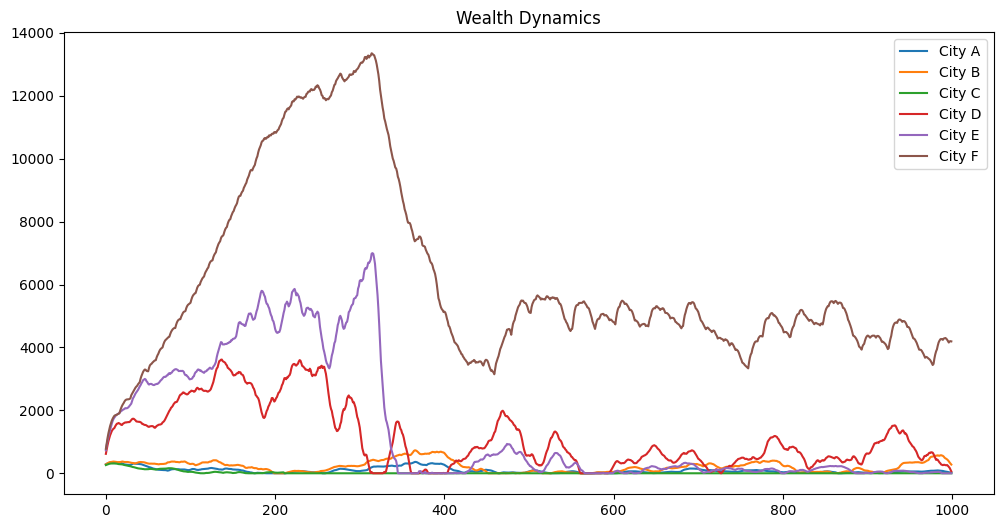

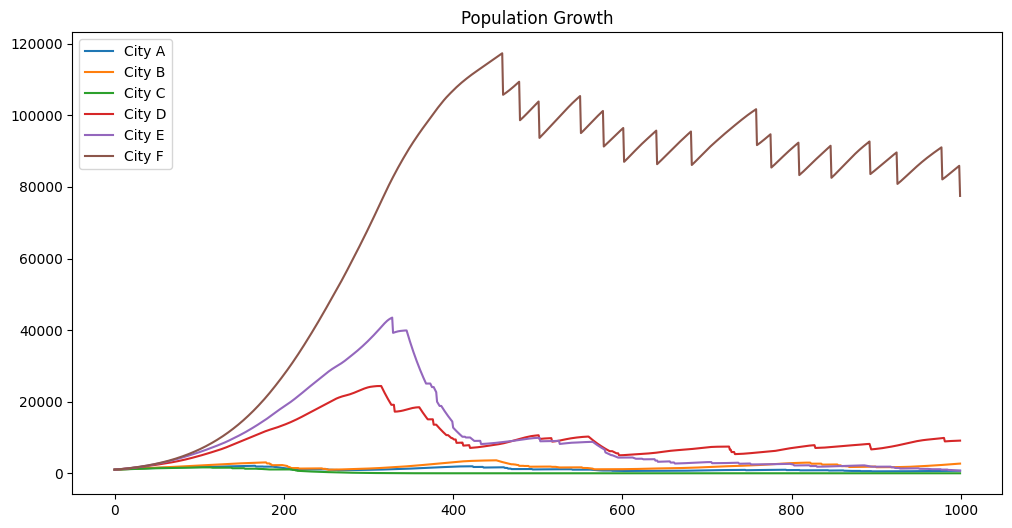

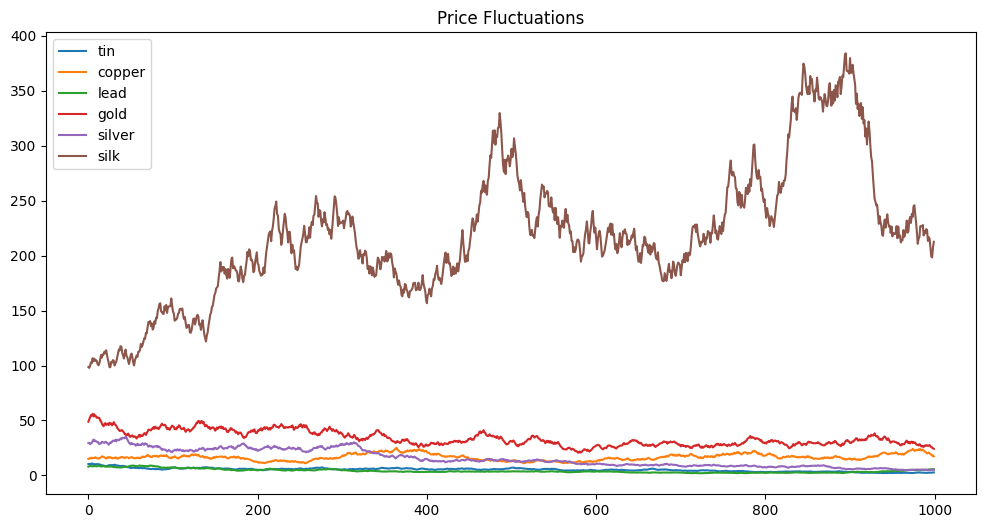

In [89]:
import mesa
import random
import matplotlib.pyplot as plt
from math import exp, factorial

random.seed(488)

class CityAgent(mesa.Agent):
    """A city with production, trade, and population dynamics."""
    def __init__(self, unique_id, model, production):
        super().__init__(unique_id, model)
        self.production = production
        self.stock = production.copy()
        self.wealth = 100 # starting wealth
        self.population = 1000 # starting population
        self.production_efficiency = 1.0 # production parameter // not dependent on the population
        self.trade_efficiency = 1.0 # trade parameter
        self.war_status = False
        self.war_duration = 0 # tracking war duration

    def produce_goods(self):
        """Produce goods with a moderated population factor."""
        for good, quantity in self.production.items():
            population_factor = (self.population / 1000) ** 0.7 # diminishing returns on growing population
            produced = int(quantity * self.production_efficiency * population_factor) # calculate production
            self.stock[good] = self.stock.get(good, 0) + produced # add to the stock

    def find_buyer(self, good):
        """Find a buyer for a given good."""
        potential_buyers = [
            city for city in self.model.schedule.agents
            if good not in city.production and city.unique_id != self.unique_id # no realising wealth from self-trade
        ]
        return random.choice(potential_buyers) if potential_buyers else None

    def trade(self):
        """Trade goods for profits with reduced distance penalties."""
        for good, quantity in list(self.stock.items()):
            while self.stock[good] > 0:
                buyer = self.find_buyer(good)
                if not buyer:
                    break

                distance = self.model.distances.get((self.unique_id, buyer.unique_id), 20)
                distance_penalty = max(0.7, 1 - (distance / 400))  # changed penalty function

                trade_amount = min(self.stock[good], random.randint(1, 5)) # choose a random amount to trade
                trade_profit = trade_amount * self.model.base_prices[good] * self.trade_efficiency * distance_penalty
                trade_profit = min(trade_profit, trade_amount * 100) # cap proft from trade

                self.wealth += trade_profit
                self.stock[good] -= trade_amount

    def consume(self):
        """Handle consumption and population changes."""
        total_consumption = self.population / 10 + max(0, (self.wealth - (self.population / 10)) * 0.15) # wealth effect
        if self.wealth > total_consumption:
            self.wealth -= total_consumption
            growth_rate = 0.005 + 0.005 * min((self.wealth - total_consumption) / total_consumption, 5)  # scales with surplus wealth
            self.population += int(self.population * growth_rate)
        else:
            self.wealth = max(0, self.wealth - total_consumption)
            decline_rate = 0.005 + 0.015 * min((total_consumption - self.wealth) / max(total_consumption, 1), 1)  
            self.population = max(1, int(self.population * (1 - decline_rate)))

        if self.wealth < total_consumption * 0.5 and random.random() < 0.05: # famine
            self.population = int(self.population * 0.9) # 10% population instantly dies

    def poisson_probability(self):
        """War duration-based peace probability."""
        return 0 if self.war_duration == 0 else 1 - (exp(-0.5) / factorial(self.war_duration))

    def start_war(self):
        """Initiate war with reduced impacts."""
        self.war_status = True
        self.trade_efficiency *= random.choice([0.55, 0.65, 0.75, 0.85, 0.95])  # random impact on efficiency
        self.production_efficiency *= random.choice([0.5, 0.6, 0.7, 0.8, 0.9])  # and on production

    def end_war(self):
        """End war and begin recovery."""
        self.war_status = False
        self.war_duration = 0

    def step(self):
        """Execute production, trade, consumption, and war checks."""
        if self.war_status:
            self.war_duration += 1
            if random.random() < self.poisson_probability():
                self.end_war()
        else:
            self.trade_efficiency = min(1.0, self.trade_efficiency + 0.01)
            self.production_efficiency = min(1.0, self.production_efficiency + 0.01)

        self.produce_goods()
        self.trade()
        self.consume()

class TradeModel(mesa.Model):
    """Balanced trade model with dynamic pricing and war mechanics."""
    def __init__(self):
        super().__init__()
        self.schedule = mesa.time.RandomActivation(self)
        self.base_prices = {
            'tin': 10, 'copper': 15, 'lead': 8, 'gold': 50, 'silver': 30, 'silk': 100
        }
        self.production = {
            'A': {'tin': 10, 'copper': 5}, 'B': {'tin': 4, 'copper': 8, 'lead': 2},
            'C': {'copper': 2, 'lead': 10, 'gold': 1}, 'D': {'lead': 5, 'gold': 7},
            'E': {'gold': 2, 'silver': 12}, 'F': {'silver': 3, 'silk': 4}
        }
        self.distances = {
            ('A', 'B'): 10, ('A', 'C'): 12, ('A', 'D'): 24, ('A', 'E'): 30, ('A', 'F'): 32,
            ('B', 'C'): 9, ('B', 'D'): 13, ('B', 'E'): 28, ('B', 'F'): 24,
            ('C', 'D'): 14, ('C', 'E'): 20, ('C', 'F'): 19,
            ('D', 'E'): 8, ('D', 'F'): 18, ('E', 'F'): 15
        }
        for (c1, c2), d in list(self.distances.items()):
            self.distances[(c2, c1)] = d

        for city_id, goods in self.production.items():
            self.schedule.add(CityAgent(city_id, self, goods))

        self.wealth_history = {cid: [] for cid in self.production}
        self.population_history = {cid: [] for cid in self.production}
        self.price_history = {good: [] for good in self.base_prices}

    def trigger_war(self):
        """Randomly initiate war in a city (less frequent)."""
        if random.random() < 0:   # war currently turned off
            target = random.choice(list(self.production.keys()))
            agent = next(a for a in self.schedule.agents if a.unique_id == target)
            agent.start_war()

    def update_prices(self):
        """Dynamic pricing with smooth fluctuations."""
        total_stocks = {good: 0 for good in self.base_prices}
        for agent in self.schedule.agents:
            for good, qty in agent.stock.items():
                total_stocks[good] += qty

        for good in self.base_prices:
            new_price = self.base_prices[good] * (1 + random.uniform(-0.05, 0.05))
            self.base_prices[good] = max(2, new_price)  
            self.price_history[good].append(self.base_prices[good])

    def step(self):
        """Model step with dynamic pricing."""
        self.trigger_war()
        self.update_prices()
        self.schedule.step()

        for agent in self.schedule.agents:
            self.wealth_history[agent.unique_id].append(agent.wealth)
            self.population_history[agent.unique_id].append(agent.population)

    def run(self, steps):
        """Run simulation and generate visualisations."""
        for _ in range(steps):
            self.step()

        plt.figure(figsize=(12, 6))
        for cid, wealth in self.wealth_history.items():
            plt.plot(wealth, label=f'City {cid}')
        plt.title('Wealth Dynamics')
        plt.legend()
        plt.show()

        plt.figure(figsize=(12, 6))
        for cid, pop in self.population_history.items():
            plt.plot(pop, label=f'City {cid}')
        plt.title('Population Growth')
        plt.legend()
        plt.show()

        plt.figure(figsize=(12, 6))
        for good, prices in self.price_history.items():
            plt.plot(prices, label=good)
        plt.title('Price Fluctuations')
        plt.legend()
        plt.show()

# Run the modified simulation
model = TradeModel()
model.run(1000)

Lowering the costs of transportation makes cities trade more resilient and helps stabilise the economies.

Note: run more simulation to get more robust results